# 🟡Step 0: Imports


**Most Relevant Papers** <br />
https://arxiv.org/pdf/1407.5675.pdf <br />
https://arxiv.org/pdf/1701.08784.pdf

In [4]:
from utils import *
%matplotlib inline

# 🟡Step 1: Read the data (tar.gz file)
As a first step, we unzipped the tar.gz file into a .dat file using 7-zip. 
Then, we convert the .dat file into a string and then into a DataFrame.

.strip() --> remove spaces on the sides

.split() --> separate values by spaces (otherwise we'd get a single conlumn)

In [5]:
# Convert .dat file into string (list comprehension)
datContent = [i.strip().split() for i in open("tth_semihad.dat").readlines()]

# Convert list into DataFrame
mydata = pd.DataFrame(datContent)

# 🟡Step 2: Explore the data
**Physics**

Jonas: "The file was produced from a simulation of pp->tt~H where the top decays hadronically
and the anti-top decays leptonically. <br /> I selected events with exactly 1 fat jet with R=1.5."


**Notes**
- The rows represent events (of 1 fat jet each, R = 1.5) 
- The first column represents the number of constituents of the jet  
- The following columns represent the coordinates of the constituents, η, φ, pT, cycling in that order. <br />(e.g. columns 1, 2, 3 are η, φ, pT for the 1st constituent, columns 4, 5, 6 are η, φ, pT for the 2nd constituent etc.)

<br />

- -infinity < η < infinity 
- -π < φ < π
- pT[GeV] > 0



In [6]:
# Display the data
mydata = mydata.rename(columns={0: 'Const'})
display(mydata.head())

# Print statements
events = mydata.shape[0]
print('There are {} rows (events).'.format(events))
print('The maximum number of constituents in an event is {}.'.format((mydata.shape[1] - 1) // 3))

# Display data types
#print('\nData Types: \n', mydata.dtypes)

# Descriptive statistics on data
#mydata.describe()

,Const,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,107,108
0,4,2.30474,0.221042,78.9436,1.00519,0.736657,61.9115,1.25546,0.748395,48.9755,...,None,None,None,None,None,None,None,None,None,None
1,2,2.35134,-2.18449,176.076,2.46233,-1.50073,47.3355,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,6,0.492933,0.766876,51.5247,-0.984489,2.29985,13.7463,0.103217,1.40088,5.31666,...,None,None,None,None,None,None,None,None,None,None
3,10,-0.624329,0.566723,130.197,-0.602316,0.573666,38.5226,-0.541426,0.449072,15.3244,...,None,None,None,None,None,None,None,None,None,None
4,15,-0.538961,-0.617644,0.819517,0.527734,1.53319,1.94989,0.20174,0.916744,5.63418,...,None,None,None,None,None,None,None,None,None,None


There are 12177 rows (events).
The maximum number of constituents in an event is 36.


#### 🔴 Mild Pre-Processing

1. Define function to separate constituents from coordinates, deal with NaN values, and convert values to floats.
2. Define processed dataframe and constituents vector

---

**Note: This is for testing only (displaying events throughout)**

In [7]:
def preprocessdf(df):
    '''
    -Extracts no. of constituents
    -Drops constituents column
    -Replaces NaN values with 0
    -Converts all values to floats
    
    Input: DataFrame to be transformed
    Output: Transformed DataFrame, constituents Series 
    '''
    
    # Create df copy
    df1 = df.copy(deep=True)
    
    # Extract constituents column
    const = df1['Const']
    # Drop constituents from df
    df1 = df1.drop('Const', axis=1)
    
    # Replace NaN with 0
    df1 = df1.fillna(0)

    # Convert values to floats
    df1 = df1.astype(float)
    
    return df1, const

In [8]:
# Define processed dataframe and constituents vector
mydata_prep = preprocessdf(mydata)[0]

# 🟡Step 3: Construct Average Jet Image

**Jonas:**

The data in each row represents all the constituents of a fat jet in the original (φ,η,pT) coordinate system of the detector. 
You should now transform all the constituents of one fat jet (i.e. individually for each row in the data file) into a new coordinate system 
(φ',η’,pT). Consequently you transform/bin this information into a two-dimensional image/Heat Map.   

The steps in detail are

1. Find the constituent with the highest pT
2. Choose the center of the new coordinate system such that this constituent has the coordinates (φ’,η’)=0. This operation corresponds to rotating and boosting along the beam direction to center the jet.  
3. Rotate all constituents around (φ’,η’)=0 such that the constituent with the 2nd highest pT is at 12 o’clock, i.e. at  (φ’,η’)=(0,e) with e > 0.
4. Flip all the constituents such that the constituents with the 3rd highest pT is on the right, i.e. at (φ’,η’)=(f,e) with f > 0
5. Define a 2-dim image with 40x40 pixels which correspond to η', φ' ∈ (−R, R). The jets we are looking at are approximately cone-shaped with radius R. I.e. all the constituents of the jet should end up within this image. For each pixel you now store the sum of the pT of all constituents that are located within this pixel. I.e. you discretise the (φ’,η’) coordinates into pixels and the intensity of the pixel corresponds to the sum of the energy of all constituents in the pixel.

As a very first step you can plot the images constructed from just steps 1)+2)+5) for a couple of jets. All the images will only have a few pixels filled. Subsequently you should plot the sum of all these images. This should give a broad peak at the center. 

Finally you should apply 1)-5) and plot the sum. This should hopefully look like the image from the reference. 



---
<br />

---
<br />

---
<br />

---
<br />

---

### 🔵 0. Define image plotting functions

#### 🔴 Helper Function that creates an image of events

1. Bins η, φ, p
2. Creates Image using np.histogram2d(). pd.DataFrame(), sns.heatmap()

In [9]:
# utils.py

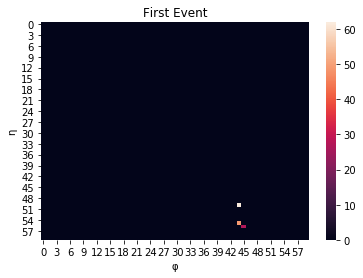

In [10]:
# Single Event Example using the first event
plot_events(mydata_prep.iloc[0], title='First Event', ylabel='η', xlabel='φ')

In [ ]:
# # Multiple events example using unprocessed dataframe
# plot_events(mydata_prep, title='Unprocessed Image with R = 5', R=5, ylabel='η', xlabel='φ')

---
<br />

---
<br />

---
<br />

---
<br />

---

### 🔵 1. Extract Maxima
For each row, extract the maximum pT and its corresponding η and φ. <br />
We also extract the 2nd and 3rd maximum pT's for future use. 

---

#### 🔴 Define Helper Function that returns 3 vectors, one for each pT and its η, φ. (For the three maximum pT's)

- **1st vector**: 1st maximum pT and its η, φ
- **2nd vector**: 2nd maximum pT and its η, φ
- **3rd vector**: 3rd maximum pT and its η, φ

In [11]:
# Example using first event
extract_max123(mydata_prep.iloc[0])

(pT    78.943600
 φ      0.221042
 η      2.304740
 dtype: float64,
 pT    61.911500
 φ      0.736657
 η      1.005190
 dtype: float64,
 pT    48.975500
 φ      0.748395
 η      1.255460
 dtype: float64)

**Why the if statement?** (note to self) <br />
Because if maximum pT is 0 in the pdata vector, it picks the ID of the first pT by default as the max (because they're all 0). <br />
Then, it goes to the non-zero'd event vector and adds its non-zero pT as the max, when the value of that max should clearly have been 0.

So the if statement fixes this: <br />
- If max pT != 0, then add it as normal.
- If max pT = 0, then add '0' as its value instead. (with the coordinates of the first pT, which is incorrect, but this doesn't matter since pT = 0 are not taken into account in the image) <br />


---

#### 🔴 Define list of 3 DataFrames containing the maxima (+ η, φ)

Note: Try this using the map() function instead

In [12]:
maxpt1 = []
maxpt2 = []
maxpt3 = []

start = time.time()

# For all events, add maxima to & coordinates to list
for i in range(events):
    maxpt1.append(extract_max123(mydata_prep.iloc[i])[0])
    maxpt2.append(extract_max123(mydata_prep.iloc[i])[1])
    maxpt3.append(extract_max123(mydata_prep.iloc[i])[2])
    
# Turn lists into DataFrames
max1 = pd.DataFrame(maxpt1)
max2 = pd.DataFrame(maxpt2)
max3 = pd.DataFrame(maxpt3)

# Create list of DataFrames containing all df for the 3 maxima
max123 = [max1, max2, max3]

end = time.time()
print('Time taken: {0:.2f}s'.format(end-start))

Time taken: 45.00s


In [13]:
# Display max123 DataFrame
display(max123)

[             pT         φ         η
 0       78.9436  0.221042  2.304740
 1      176.0760 -2.184490  2.351340
 2      111.4880  1.396430 -0.620303
 3      130.1970  0.566723 -0.624329
 4      258.9400  0.304648  0.191801
 ...         ...       ...       ...
 12172   67.6743 -0.505784  0.307106
 12173   80.6389 -0.073204 -2.418710
 12174  121.6040 -0.378084  1.392990
 12175  148.5020  2.665060  1.192300
 12176  300.4430 -2.142970  0.758524
 
 [12177 rows x 3 columns],
              pT         φ         η
 0       61.9115  0.736657  1.005190
 1       47.3355 -1.500730  2.462330
 2       87.8226  1.392020 -0.628435
 3       38.5226  0.573666 -0.602316
 4      153.9190  0.358189  0.173329
 ...         ...       ...       ...
 12172   41.7192 -0.475893  0.436089
 12173   69.2937 -0.250145 -2.200330
 12174   79.3495 -0.508426  0.283491
 12175   51.7881  2.663600  1.248160
 12176  106.4300 -1.712760  0.945117
 
 [12177 rows x 3 columns],
               pT         φ         η
 0       48.9755

---
<br />

---
<br />

---
<br />

---
<br />

---

### 🔵2. Shift: Centre Image
For each row, we centre a new coordinate system so that the highest pT constituent's coordinates are (φ', η') = (0, 0). <br />
This corresponds to rotating and boosting along the beam direction to center the jet.

**φ Tranformation**<br />
For the φ transformation, we subtract the φ (of the max pT) from all φ's in that row. <br />
If the values exceed [-π, π], we add 2π to the final result (if it's <-π) or subtract 2π from the final result (if it's >π). This makes sure that no values exceed the original φ interval. <br />
This has the effect of making the φ (corresponding to the max pT for that row) equal to 0 in each row, and shifting the other φ's by that same angle, while maintaining a range of 2π. <br />

**η Transformation**<br />
How does η transform? We need a Lorentz Transformation. 

**Paper** (E) <br />
Histograms binned in
either the angular separation of events or the rapidity separation of events can
be contributed to by events whose centre of mass frames are boosted by arbitrary velocities with respect to the rest frame of the detector, the lab frame.
The resulting histograms are undistorted by these centre of mass frame boosts
parallel to the beam axis, as the dependent variable is invariant with respect
to this sub–class of Lorentz boosts.

**Paper** (F): make code cell below markdown to display


In [18]:
#<img src="h1.png" width="500"> <img src="h2.png" width="500">

φ Only Example Comparison found in utils

## 🔴 **Centering Transformation** (η and φ)


#### 🔴 Helper Function

In [22]:
def center(event1, max123, output='event', R=1.5, pixels=60):
    
    '''
    Centers image around (φ', η') = (0, 0). Both transformations are linear (so far). 
    
    event1: the event (row) to be transformed
    max123: list of 3 dataframes of max pT, η, φ. Obtained using the extract_max123() function
    output: 'event' to return a Series of the transformed event1. 'image' to return a transformed dataframe representing an image 
    '''
    # For testing only. Redundant
    mydata_prep = preprocessdf(mydata)[0]
    
    # Define η, φ indices to be used later
    h_indices = mydata_prep.iloc[0][::3].index
    f_indices = mydata_prep.iloc[0][1::3].index

    # Create copy of event
    event = event1.copy(deep=True)

    # For all η, φ in the event
    for h_index, f_index in zip(h_indices, f_indices):             

        # Define Useful Quantities
        num_index = event.name                   # index of event, so that we can find its corresponding φ in the max123[0] dataframe of max pT's and φ, η's
        maxh = max123[0].iloc[num_index]['η']    # η of max1 pT value
        maxf = max123[0].iloc[num_index]['φ']    # φ of max1 pT value
        f = event.iloc[1::3][f_index]            # φ original value
        
        # η Transformation
        event.iloc[::3][h_index] -= maxh         # Subtract max η from current η
        
        # φ Transformation (Note: the if statements take periodicity into account, making sure that range does not exceed 2π)
        if (f - maxf) < -np.pi:
            event.iloc[1::3][f_index] = f + 2*np.pi - maxf

        elif (f - maxf) > np.pi:
            event.iloc[1::3][f_index] = f - 2*np.pi - maxf

        else: 
            event.iloc[1::3][f_index] -= maxf     # Subtract max φ from current φ
    

            

    if output == 'event':
        return event
    
    elif output == 'image':
        # Initiate bin lists
        bin_h = []
        bin_f = []
        bin_p = []

        # Define max number of constituents 
        max_const = event.shape[0] // 3
        # For all constituents
        for i in range(max_const):
            # Add constituent's η, φ, p to bins
            bin_h.append(list(event.iloc[::3])[i])
            bin_f.append(list(event.iloc[1::3])[i])
            bin_p.append(list(event.iloc[2::3])[i])

        # Turn lists into Series
        bin_h = pd.Series(bin_h)
        bin_f = pd.Series(bin_f)
        bin_p = pd.Series(bin_p)

        # Define no. of bins
        bin_count = np.linspace(-R, R, pixels + 1)

        # Create bins from -R to R and convert to DataFrame
        bins = np.histogram2d(bin_h, bin_f, bins=bin_count, weights=bin_p)[0] # x and y are switch because when the bins were turned into a Series the shape[0] and shape[1] were switched
        bins = pd.DataFrame(bins)
        image = bins
        
        return image

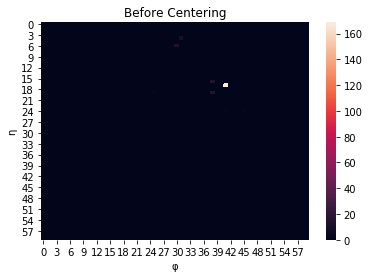

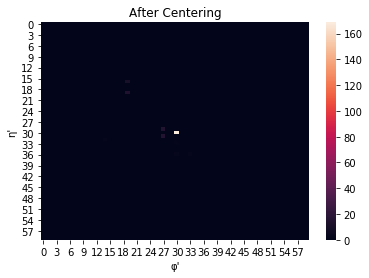

In [26]:
# Test with single event
e = 3
plot_events(mydata_prep.iloc[e], title='Before Centering', xlabel='φ', ylabel='η')
image=center(mydata_prep.iloc[e], max123, output='image')
sns.heatmap(image)
plt.title('After Centering')
plt.xlabel('φ\'')
plt.ylabel('η\'')
plt.show()

#### 🔴 Create Centered DataFrame

In [ ]:
def preprocess(event1):
    '''
    -Extracts no. of constituents
    -Drops constituents column
    -Replaces NaN values with 0
    -Converts all values to floats
    
    Input: Series (event) to be processed
    Output: Processed Series, constituents Series 
    '''
    
    # Create series copy
    event = event1.copy(deep=True)
    
    # Extract constituents 
    const = event['Const']
    # Drop constituents from row
    event = event.drop(labels='Const')
    
    # Replace NaN with 0
    event = event.fillna(0)

    # Convert values to floats
    event = event.astype(float)
    
    return event, const



In [ ]:
mydata_prep, const = prep(mydata)

In [ ]:
maxpt1 = []
maxpt2 = []
maxpt3 = []

start = time.time()

# For all events, add maxima to & coordinates to list
for i in range(events):
    maxpt1.append(extract_max123(mydata_prep.iloc[i])[0])
    maxpt2.append(extract_max123(mydata_prep.iloc[i])[1])
    maxpt3.append(extract_max123(mydata_prep.iloc[i])[2])
    
# Turn lists into DataFrames
max1 = pd.DataFrame(maxpt1)
max2 = pd.DataFrame(maxpt2)
max3 = pd.DataFrame(maxpt3)

# Create list of DataFrames containing all df for the 3 maxima
max123 = [max1, max2, max3]

end = time.time()
print('Time taken: {0:.2f}s'.format(end-start))

In [50]:
### φ, η transform all events
centered = []

start = time.time()

# Create matrix of transformed events
for i in range(events):
    centered.append(center(mydata_prep.iloc[i], max123))

end = time.time()

# Turn matrix into DataFrame
mydata_centered = pd.DataFrame(centered)

print('Time taken to centre image: {0:.2f}s'.format(end-start))

Time taken to centre image: 141.76s


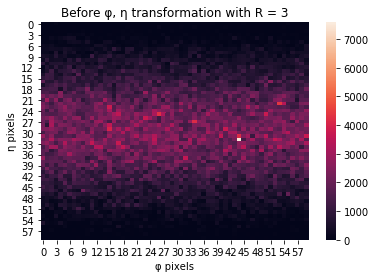

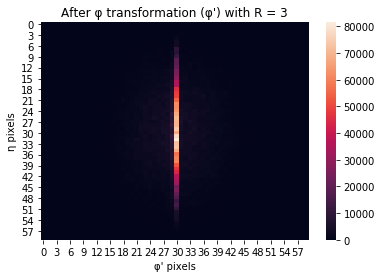

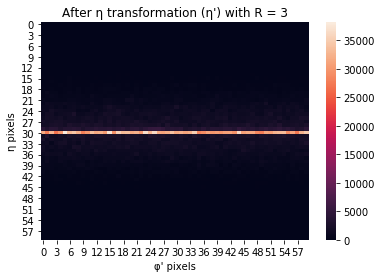

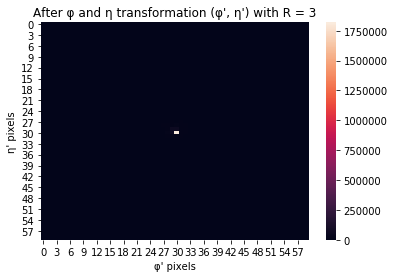

Time Taken: 605.08s


In [55]:
# Average Image
start = time.time()
plot_events(mydata_prep, R=3, title='Before φ, η transformation with R = 3', xlabel='φ pixels', ylabel='η pixels')
plot_events(mydata_fprime, R=3, title='After φ transformation (φ\') with R = 3', xlabel='φ\' pixels', ylabel='η pixels')
plot_events(mydata_hprime, R=3, title='After η transformation (η\') with R = 3', xlabel='φ\' pixels', ylabel='η pixels')
plot_events(mydata_centered, R=3, title='After φ and η transformation (φ\', η\') with R = 3', xlabel='φ\' pixels', ylabel='η\' pixels')
end = time.time()
print('Time Taken: {0:.2f}s'.format(end-start))

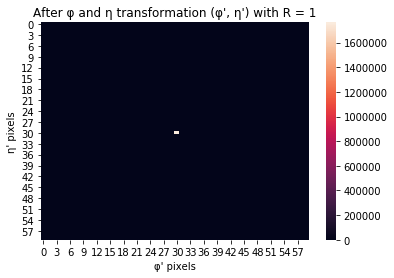

In [66]:
plot_events(mydata_centered, R=0.01, title='After φ and η transformation (φ\', η\') with R = 1', xlabel='φ\' pixels', ylabel='η\' pixels')

---
<br />

---
<br />

---
<br />

---
<br />

---

### 🔵(Incomplete) 3. Rotation: Rotate image such that 2nd max pT is at 12 o'clock
Rotate all constituents around (φ’,η’)=0 such that the constituent with the 2nd highest pT is at 12 o’clock, i.e. at  (φ’,η’)=(0,e) with e > 0.

**Paper (C)** <br />
"Rotation: Rotation is performed to remove the stochastic nature of the decay
angle relative to the η − φ coordinate system. This alignment can be done very
generally, by determining the principle axis [48] of the original image and rotating the imagine around the jet-energy centroid such that the principle axis
is always vertical."

#### Resources
https://stackoverflow.com/questions/53854066/pythonhow-to-rotate-an-image-so-that-a-feature-becomes-vertical

https://alyssaq.github.io/2015/computing-the-axes-or-orientation-of-a-blob/

https://pythontic.com/image-processing/pillow/rotate

https://www.askpython.com/python/examples/rotate-an-image-by-an-angle-in-python

https://www.pyimagesearch.com/2017/01/02/rotate-images-correctly-with-opencv-and-python/




---
<br />

---
<br />

---
<br />

---
<br />

---

### 🔵(Incomplete) 4. Flip: Flip image so that 3rd max pT is in right-half plane
Flip all the constituents such that the constituents with the 3rd highest pT is on the right, i.e. at (φ’,η’)=(f,e) with f > 0

---
<br />

---
<br />

---
<br />

---
<br />

---

### 🔵5. Image: Create 40x40 Image
1. Define Data that will create the bins (η, φ) and will weigh the bins (pT)
2. Using the bins, create a 2D histogram using numpy's histogram2d()
3. Input the histogram as a DataFrame into Seaborn's heatmap()
4. Tadaaaa


---

#### 🔴 Old code to check if bins are crated correctly

In [ ]:
# Test if bin lengths match
if (len(bin_h) == len(bin_f)) and (len(bin_f) == len(bin_p)):
    print('\nSuccess: Bin lengths match! :D')
else:
    print('\nError: Bin lengths don\'t match!!! :  -  (')
    assert (len(bin_h) == len(bin_f)) and (len(bin_f) == len(bin_p))

# Test if max and min values make sense
print('\nη bin range: [', round(min(bin_h), 2), ', ', round(max(bin_h), 2), ']')
print('φ bin range: [', round(min(bin_f), 2), ', ', round(max(bin_f), 2), ']')
print('p bin range: [', round(min(bin_p), 2), ', ', round(max(bin_p), 2), ']')

---

---

---